In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
from dataloader import *
from plotter import *
from scripts import *
from neural_net import *
from itertools import combinations

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
with open("../data/13Pextractedmin.txt", "r") as f:
    lines = f.readlines()
    global_mins = []
    it = 0
    for i, line in enumerate(lines):
        data = line.split()
        if i%13 == 0:
            global_mins.append([])
            it+=1
        for j in range(len(data)):
            global_mins[it-1].append(float(data[j]))

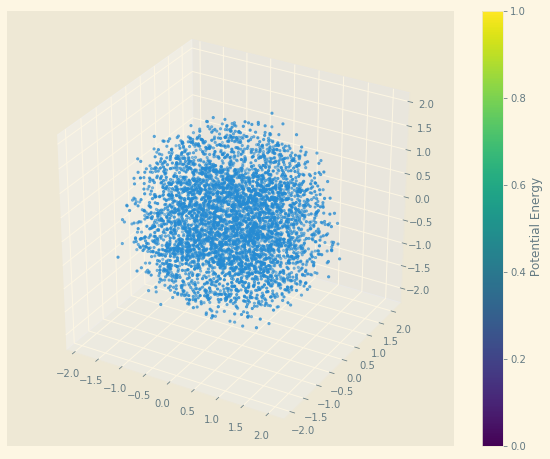

In [3]:

x = []
y = []
z = []
c = []
for i in range(len(global_mins)):
    for j in range(0, len(global_mins[i]), 13):
        x.append(global_mins[i][j+0])
        y.append(global_mins[i][j+1])  
        z.append(global_mins[i][j+2])
plt.style.use('Solarize_Light2')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
a = ax.scatter(x, y, z, s=5)
fig.colorbar(a, label=' Potential Energy')
plt.show()

In [4]:
coordinates = load_features("../data/13P_CENTERED.txt", 13)
potentials = load_labels("../data/13P_POTENTIALS.txt", 1)

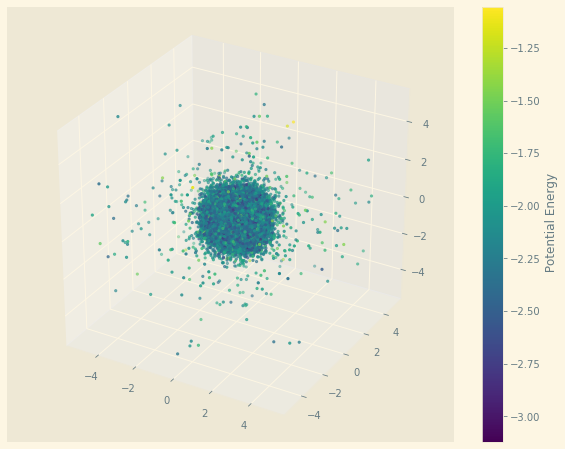

In [5]:

x = []
y = []
z = []
c = []
for i in range(len(coordinates)):
    for j in range(0, len(coordinates[i]), 13):
        x.append(coordinates[i][j+0])
        y.append(coordinates[i][j+1])  
        z.append(coordinates[i][j+2])
        c.append(potentials[i])
plt.style.use('Solarize_Light2')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
a = ax.scatter(x, y, z, s=5, c=np.reshape(c, len(c)))
fig.colorbar(a, label=' Potential Energy')
plt.show()

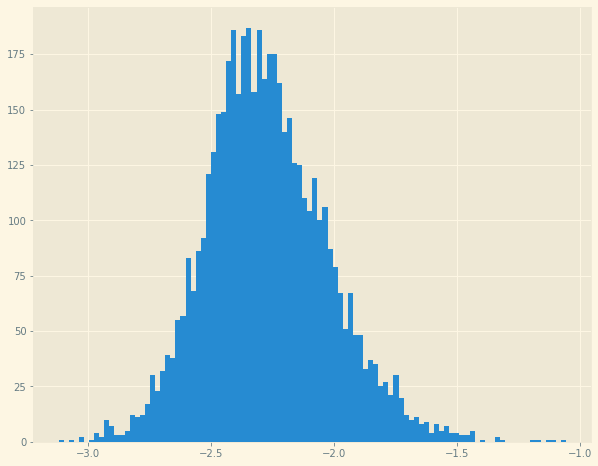

In [6]:
plot_histogram(potentials)

In [7]:
#extract some information from the feature space 
side_length_space = [] #side lengths between each particles
perimeter = [] #side lengths between each particles
n_bonds = np.zeros(len(coordinates)) #number of bonds in the structure
cut_off_distance = 1.5 #sigma  
num_particles = 13
rg = []
for i in range(len(coordinates)):
    side_length_space.append([])
    particles = np.reshape(coordinates[i], [num_particles, 3])
    perms = combinations(particles, 2) 
    for perm in perms:
        side_length_space[i].append(np.linalg.norm(perm[0] - perm[1]))   
    rg.append(np.sum(np.square(side_length_space[i]))/13.0)
    perimeter.append(np.sum(side_length_space[i]))
    for j in range(len(side_length_space[i])):
        if side_length_space[i][j] < cut_off_distance:
            n_bonds[i] += 1 

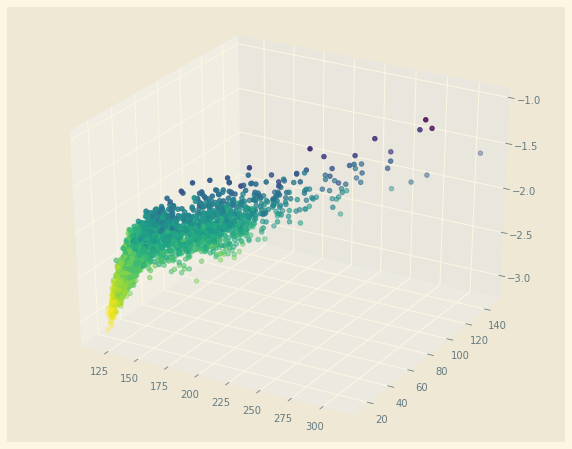

In [8]:
plot_3d(perimeter, rg, potentials, color=n_bonds)

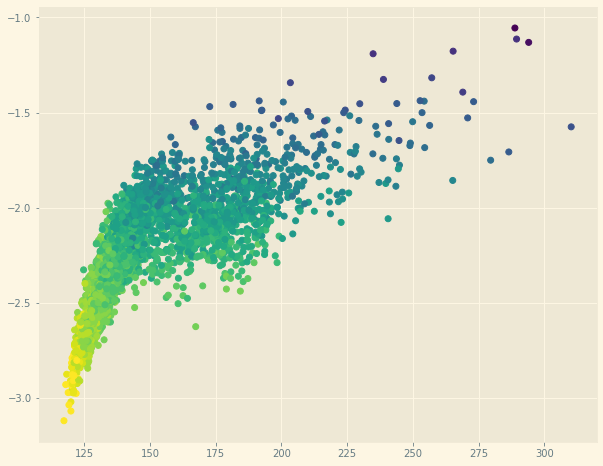

In [9]:
plot_2d(perimeter, potentials, color=n_bonds)

In [10]:
structure = [39, 50, 50, 50, 13, 5, 3, 1]
activations = ['sigmoid' for i in range(len(structure))]

nn = NEURAL_NET(13, structure, activations)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [11]:
model_dir = "../models/13P_T035_1.ckpt"
nn.learning_rate=0.01
nn.train(coordinates, potentials, 
         num_steps=10000, 
         display_step=1000, 
         test_set_size=1000, 
         restore=False, save=True, model_save_dir=model_dir)

InternalError: Blas GEMM launch failed : a.shape=(4001, 39), b.shape=(39, 50), m=4001, n=50, k=39
	 [[node MatMul (defined at C:\Users\Aditya Dendukuri\Documents\projects\DimReductionThermodynamics\src\neural_net.py:90) ]]

Caused by op 'MatMul', defined at:
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\asyncio\base_events.py", line 539, in run_forever
    self._run_once()
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\asyncio\base_events.py", line 1775, in _run_once
    handle._run()
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 378, in dispatch_queue
    yield self.process_one()
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\tornado\gen.py", line 225, in wrapper
    runner = Runner(result, future, yielded)
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\tornado\gen.py", line 714, in __init__
    self.run()
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2854, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2880, in _run_cell
    return runner(coro)
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3057, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3248, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-e2ff01e1a97e>", line 4, in <module>
    nn = NEURAL_NET(13, structure, activations)
  File "C:\Users\Aditya Dendukuri\Documents\projects\DimReductionThermodynamics\src\neural_net.py", line 39, in __init__
    self.reduce_dimension_node = self.reduce_dimension(self.H)
  File "C:\Users\Aditya Dendukuri\Documents\projects\DimReductionThermodynamics\src\neural_net.py", line 90, in reduce_dimension
    x = tf.add(tf.matmul(x, self.weights[i]), self.biases[i])
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\tensorflow\python\ops\math_ops.py", line 2455, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 5333, in mat_mul
    name=name)
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3300, in create_op
    op_def=op_def)
  File "C:\Users\Aditya Dendukuri\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

InternalError (see above for traceback): Blas GEMM launch failed : a.shape=(4001, 39), b.shape=(39, 50), m=4001, n=50, k=39
	 [[node MatMul (defined at C:\Users\Aditya Dendukuri\Documents\projects\DimReductionThermodynamics\src\neural_net.py:90) ]]


In [ ]:
reduced_space = nn.get_reduced_space(coordinates, model_dir)
predicted_potentials = nn.get_output_space(coordinates, model_dir)

array([ 0.00000000e+00+0.00000000e+00j,  8.44040128e+00+0.00000000e+00j,
        5.70582461e+00+0.00000000e+00j,  4.53141843e+00+0.00000000e+00j,
        6.15310012e-16+0.00000000e+00j,  3.95960415e-16+0.00000000e+00j,
        1.71456787e-16+0.00000000e+00j, -2.62198769e-16+0.00000000e+00j,
       -1.95777372e-16+1.23754857e-16j, -1.95777372e-16-1.23754857e-16j,
       -2.29964549e-17+1.03688044e-16j, -2.29964549e-17-1.03688044e-16j,
       -1.34547437e-16+0.00000000e+00j])